    Beginning the Regression Preparation

In [1]:

import pandas as pd

In [2]:
#csv extraction
ps_dd_df = pd.read_csv("data\ps_dd_df.csv")
specialty_df = pd.read_csv("data\specialty_df.csv")

In [3]:
ps_dd_df.head()

,npi,specialty_description,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,generic_brand_ratio_cost,nppes_provider_city,nppes_provider_zip5,total_claim_count,...,ZOLPIDEM TARTRATE ER,ZONISAMIDE,ZOSTAVAX,ZUBSOLV,ZYDELIG,ZYPREXA,ZYPREXA RELPREVV,ZYTIGA,log_brand_cost,log_generic_cost
0,1003005661,General Practice,374.0,67923.15,1679.0,24267.72,2.798909,WASHINGTON,20002,2088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.832018,4.385029
1,1003059437,Internal Medicine,58.0,12113.23,345.0,5939.76,2.039347,WASHINGTON,20007,403,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.083260,3.773769
2,1003105875,Endocrinology,232.0,147823.30,156.0,2336.64,63.263190,WASHINGTON,20037,433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.169743,3.368592
3,1003107541,Internal Medicine,72.0,19517.20,531.0,7829.59,2.492749,WASHINGTON,20001,617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.290418,3.893739
4,1003251984,Ophthalmology,54.0,10915.73,52.0,3603.66,3.029068,WASHINGTON,20037,106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.038053,3.556744


In [4]:
specialty_df.head()

,specialty_description,counts,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,generic_brand_ratio_cost,nppes_provider_zip5,total_claim_count,total_drug_cost,...,ZONISAMIDE,ZOSTAVAX,ZUBSOLV,ZYDELIG,ZYPREXA,ZYPREXA RELPREVV,ZYTIGA,log_brand_cost,log_generic_cost,Index
0,Dentist,164,13.0,101.12,6086.0,44932.40,0.002250,3284899,11620,116910.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.004837,4.652560,0
1,Thoracic Surgery (Cardiothoracic Vascular Surg...,1,12.0,45.45,32.0,1165.89,0.038983,20010,44,1211.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.657534,3.066658,1
2,Thoracic Surgery,2,15.0,85.06,127.0,2101.56,0.040475,40027,220,3846.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.929725,3.322542,2
3,Interventional Radiology,1,11.0,1307.67,48.0,21212.87,0.061645,20037,59,22520.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.116498,4.326599,3
4,Counselor,2,15.0,1715.56,631.0,15347.16,0.111784,40036,767,26481.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.234406,4.186028,4


Building a MultiVariate Regression Model taking in Drug Claim Counts

In [5]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

Creating an ONE HOT ENCODER to allow specialty as a consideration

In [6]:
N = ps_dd_df["specialty_description"].tolist()
#print(X2)

In [7]:
N=np.reshape(N, newshape=(-1,1)) #reshapes to nested list

In [8]:
enc = OneHotEncoder()

In [9]:
enc.fit(N)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [10]:
enc.get_feature_names()

array(['x0_Allergy/ Immunology', 'x0_Anesthesiology',
       'x0_Cardiac Surgery', 'x0_Cardiology',
       'x0_Certified Clinical Nurse Specialist',
       'x0_Clinical Cardiac Electrophysiology',
       'x0_Colorectal Surgery (Proctology)', 'x0_Counselor',
       'x0_Critical Care (Intensivists)', 'x0_Dentist', 'x0_Dermatology',
       'x0_Diagnostic Radiology', 'x0_Emergency Medicine',
       'x0_Endocrinology', 'x0_Family Medicine', 'x0_Family Practice',
       'x0_Gastroenterology', 'x0_General Practice', 'x0_General Surgery',
       'x0_Geriatric Medicine', 'x0_Gynecological Oncology',
       'x0_Hematology', 'x0_Hematology-Oncology', 'x0_Hospitalist',
       'x0_Infectious Disease', 'x0_Internal Medicine',
       'x0_Interventional Cardiology', 'x0_Interventional Radiology',
       'x0_Medical Genetics', 'x0_Medical Oncology', 'x0_Nephrology',
       'x0_Neurology', 'x0_Neuropsychiatry', 'x0_Neurosurgery',
       'x0_Nurse Practitioner', 'x0_Nutritionist',
       'x0_Obstetrics &

In [11]:
array_N =enc.transform(N).toarray()

In [12]:
encoded_df = pd.DataFrame(array_N, columns = enc.get_feature_names())

In [13]:
print(encoded_df.shape)
print(ps_dd_df.shape)


(1606, 60)
(1606, 1122)


In [14]:
ML_df = pd.concat([ps_dd_df, encoded_df], axis = 1, join="inner")
# ML_df Contains new Columns that dictate specialty

In [15]:
ML_df.shape

(1606, 1182)

In [16]:
#ps_dd_df.shape


In [17]:
#ps_dd_df.isnull().any()

Begin Model Building and Fitting

In [18]:
Labels = ML_df.columns[11:1120].tolist() + ML_df.columns[1122:].tolist() #columns of drugs

In [19]:
X = ML_df[ML_df.columns[11:1120].tolist() + ML_df.columns[1122:].tolist()].values
y = ML_df["generic_brand_ratio_cost"].values
print(X)
print(len(X))
print(len(y))
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1606
1606
[ 2.79890942  2.03934671 63.26318988 ...  4.19113679  2.71277816
  3.11644047]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#Split into Test and Train
#20% train 80% test

In [21]:
#fit data into Lasso/L1 Model
regressor = linear_model.Lasso(alpha=.1 )
regressor.fit(X_train, y_train)

C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
print(len(regressor.coef_))

1169


In [23]:
coeff_df = pd.DataFrame( regressor.coef_, Labels, columns=['Coefficient'])  
coeff_df = coeff_df[coeff_df["Coefficient"] != 0]
coeff_df.sort_values("Coefficient" ,ascending = False) #Coefficients for each feature used

,Coefficient
HETLIOZ,128.333379
VENCLEXTA,25.578865
x0_Pulmonary Disease,23.520998
FUZEON,14.728446
OPSUMIT,10.821731
EASY COMFORT INSULIN SYRINGE,9.447344
ADEMPAS,9.047089
GLEEVEC,8.063182
x0_Hematology-Oncology,6.862938
BENLYSTA,4.638064


In [24]:
y_pred = regressor.predict(X_test)

In [25]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(25) #Actual Vs Predicted Dataframe

,Actual,Predicted
0,0.292026,3.839383
1,1.284322,3.398365
2,3.555232,15.768281
3,1.553801,8.199963
4,23.708637,8.880840
5,2.949730,7.884662
6,15.563345,-4.095517
7,31.850727,104.940594
8,30.703912,-2.297613
9,30.393180,10.033859


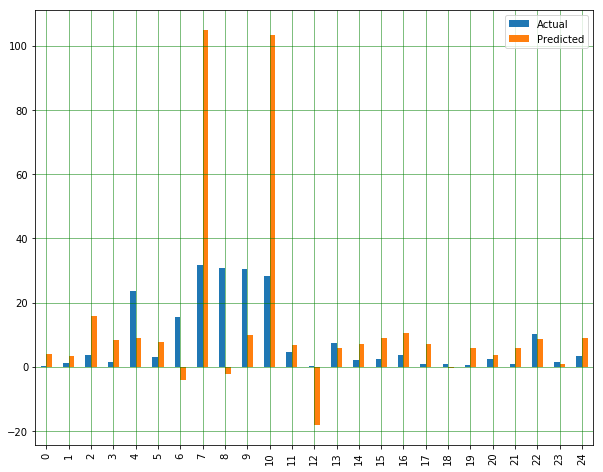

In [26]:
comparison_df.iloc[0:25].plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 40.17575231910665
Mean Squared Error: 91361.2140884397
Root Mean Squared Error: 302.2601761536569


In [28]:
print("r Squared:", metrics.r2_score(y_test, y_pred))

r Squared: -0.0005402964016287815
